In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# create the dataset

In [2]:
np.random.seed(42)

# Create a synthetic dataset
data = {
    'product_id': range(1, 21),
    'product_name': [f'Product {i}' for i in range(1, 21)],
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Sports'], 20),
    'units_sold': np.random.poisson(lam=20, size=20),  # Poisson distribution for sales
    'sale_date': pd.date_range(start='2023-01-01', periods=20, freq='D')
}

df_sales = pd.DataFrame(data)
df_sales

,product_id,product_name,category,units_sold,sale_date
0,1,Product 1,Home,25,2023-01-01
1,2,Product 2,Sports,15,2023-01-02
2,3,Product 3,Electronics,17,2023-01-03
3,4,Product 4,Home,19,2023-01-04
4,5,Product 5,Home,21,2023-01-05
5,6,Product 6,Sports,17,2023-01-06
6,7,Product 7,Electronics,19,2023-01-07
7,8,Product 8,Electronics,16,2023-01-08
8,9,Product 9,Home,21,2023-01-09
9,10,Product 10,Clothing,21,2023-01-10


#### save the data as  a csv file

In [3]:
df_sales.to_csv('df_sales.csv',index=False)

##### path location

In [4]:
import os
os.getcwd()

'C:\\Users\\hp\\Data Science class'

In [5]:
df_sales

,product_id,product_name,category,units_sold,sale_date
0,1,Product 1,Home,25,2023-01-01
1,2,Product 2,Sports,15,2023-01-02
2,3,Product 3,Electronics,17,2023-01-03
3,4,Product 4,Home,19,2023-01-04
4,5,Product 5,Home,21,2023-01-05
5,6,Product 6,Sports,17,2023-01-06
6,7,Product 7,Electronics,19,2023-01-07
7,8,Product 8,Electronics,16,2023-01-08
8,9,Product 9,Home,21,2023-01-09
9,10,Product 10,Clothing,21,2023-01-10


In [6]:
df_sales.columns

Index(['product_id', 'product_name', 'category', 'units_sold', 'sale_date'], dtype='object')

# Descriptive Stastics

In [7]:
df_sales['units_sold'].mean()  #1

18.8

In [8]:
# 2 median 
df_sales['units_sold'].median()

18.5

In [9]:
#  3 mode
df_sales['units_sold'].mode()

0    17
1    21
Name: units_sold, dtype: int32

In [10]:
# 4 variance and std
print(df_sales['units_sold'].var())
print(df_sales['units_sold'].std())

10.90526315789474
3.3023117899275864


In [11]:
df_sales.head()

,product_id,product_name,category,units_sold,sale_date
0,1,Product 1,Home,25,2023-01-01
1,2,Product 2,Sports,15,2023-01-02
2,3,Product 3,Electronics,17,2023-01-03
3,4,Product 4,Home,19,2023-01-04
4,5,Product 5,Home,21,2023-01-05


In [12]:
pd.crosstab(df_sales['product_name'],'count')

col_0,count
product_name,
Product 1,1
Product 10,1
Product 11,1
Product 12,1
Product 13,1
Product 14,1
Product 15,1
Product 16,1
Product 17,1


In [13]:
pd.crosstab(df_sales['category'],'count')

col_0,count
category,
Clothing,1
Electronics,4
Home,9
Sports,6


In [14]:
#  5 gropy by 
category_stats=df_sales.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()

In [15]:
category_stats.columns

Index(['category', 'sum', 'mean', 'std'], dtype='object')

In [16]:
# rename the columns
category_stats.columns=['Category','Total Units Solid ','Average Solid Unit','Std Average Solid']

In [17]:
category_stats

,Category,Total Units Solid,Average Solid Unit,Std Average Solid
0,Clothing,21,21.000000,NaN
1,Electronics,73,18.250000,2.217356
2,Home,181,20.111111,3.723051
3,Sports,101,16.833333,2.714160


# confidence Interval

In [20]:
df_sales.head()

,product_id,product_name,category,units_sold,sale_date
0,1,Product 1,Home,25,2023-01-01
1,2,Product 2,Sports,15,2023-01-02
2,3,Product 3,Electronics,17,2023-01-03
3,4,Product 4,Home,19,2023-01-04
4,5,Product 5,Home,21,2023-01-05


In [25]:
# Confidence Interval for the mean of units sold
confidence_level = 0.95
degrees_freedom = len(df_sales['units_sold']) - 1
sample_mean = df_sales['units_sold'].mean()
sample_standard_error = df_sales['units_sold'].std() / np.sqrt(len(df_sales['units_sold']))

# t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(17.254470507823573, 20.34552949217643)


# Hypothesis Testing

In [18]:
# Hypothesis Testing
# h0=20
# h1!=20
# here the sample is less than 30 and std is not given we have to use the t-test

from scipy import stats
t_statics,p_value=stats.ttest_1samp(df_sales['units_sold'],20)
if(p_value<0.05):# null go reject h0
    print("Reject The Null Hypothesis")
else:
    print("Accept the Null Hypothesis") # null high accept the H0

Accept the Null Hypothesis


# Visualization

##### plot distribution for units_solid

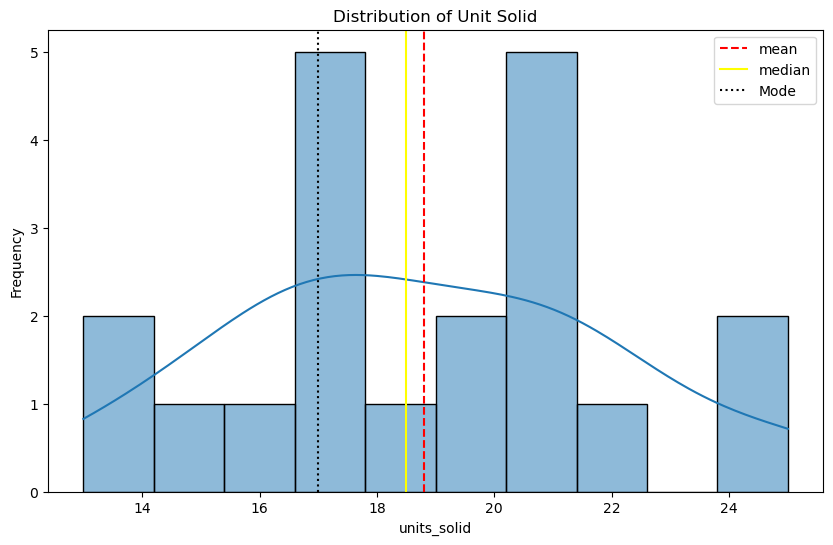

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(df_sales['units_sold'],bins=10,kde=True)
plt.title("Distribution of Unit Solid")
plt.xlabel("units_solid")
plt.ylabel("Frequency")
plt.axvline(df_sales['units_sold'].mean(),linestyle='--',color='red',label='mean')
plt.axvline(df_sales['units_sold'].median(),linestyle='-',color= 'yellow',label='median')
plt.axvline(df_sales['units_sold'].mode()[0], linestyle=':', color='black', label='Mode')
plt.legend()
plt.show()

# boxplot

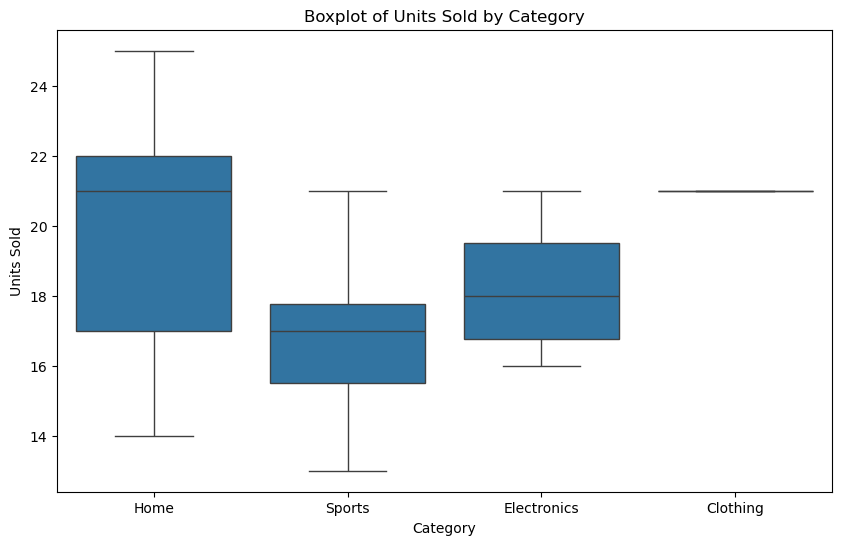

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category',y='units_sold',data=df_sales)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

# Barplot

In [49]:
category_stats.head()

,Category,Total Units Solid,Average Solid Unit,Std Average Solid
0,Clothing,21,21.000000,NaN
1,Electronics,73,18.250000,2.217356
2,Home,181,20.111111,3.723051
3,Sports,101,16.833333,2.714160


In [52]:
category_stats.columns

Index(['Category', 'Total Units Solid ', 'Average Solid Unit',
       'Std Average Solid'],
      dtype='object')

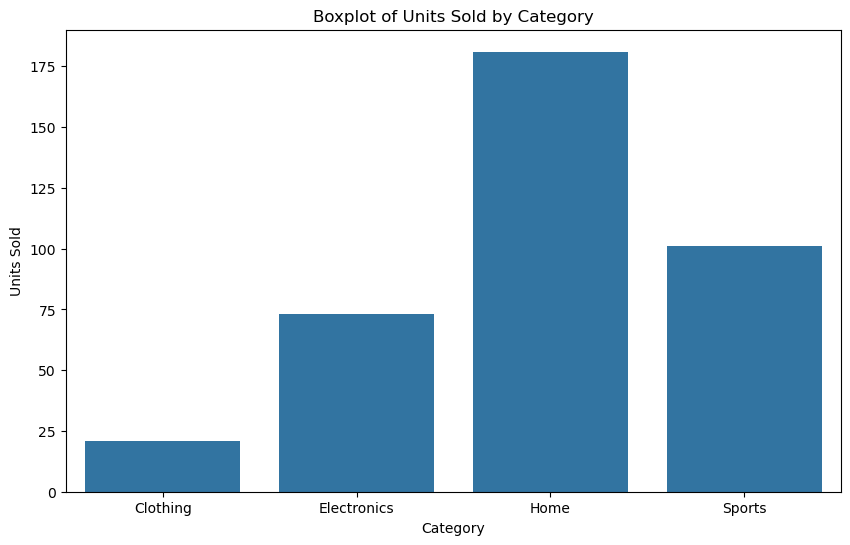

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Total Units Solid ',data=category_stats)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()